# Run 'stockread.py' once every weekday. 
## It may take up to an hour to download data 
## (depending on net speed)

In [337]:
import sys
!python3 stockreader.py

Log file name : ./logs/log_2020-Mar-04-14-54-32.txt
Wait! Download in progress ... this may take a while
-- Downloading stocks list!
-- Done!
-- Downloading latest End of Day pricing data ...
-- Done!
-- Downloading fundamental company data ...
********* Data Download Completed *********


# Import stockdatalib

In [1]:
import stockdatalib as sd

# Must set the data subdirectory

In [2]:
# Set the data directory and the stock name
sd.set_data_directory('./data/')

# Load Data and plot a stock

In [3]:
# Load S&P Stock list
stock_count, stock_fields, sp_df = sd.GetSP500_List()

In [4]:
# Set stock symbol
mystock = 'MSFT'
sd.set_stock(mystock)

In [5]:
stock_info = sd.get_stock_info(mystock)
# Get stock company information
company_name = stock_info['name'][0]
company_sector = stock_info['sector'][0]
print(stock_info)

{'stock': ['msft'], 'name': ['Microsoft Corp.'], 'sector': ['Information Technology']}


In [6]:
# Get latest price quote
print(sd.quote(mystock))

  symbol                date   close    volume
0   MSFT 2020-03-04 19:56:12  167.81  29952320


In [7]:
# Get latest key stats on the stock
sd.key_stat(mystock)

,symbol,Date,No. of Shares,Revenue,Earning before Tax,PE Ratio,Earning per Share,Net Income,Free Cash Flow Margin,Gross Profit,Free Cash Flow per Share
0,MSFT,2019-12-31,7.628000e+09,3.690600e+10,1.408500e+10,25.9384,1.53,1.164900e+10,0.191161,2.454800e+10,0.675


<Figure size 1080x432 with 0 Axes>

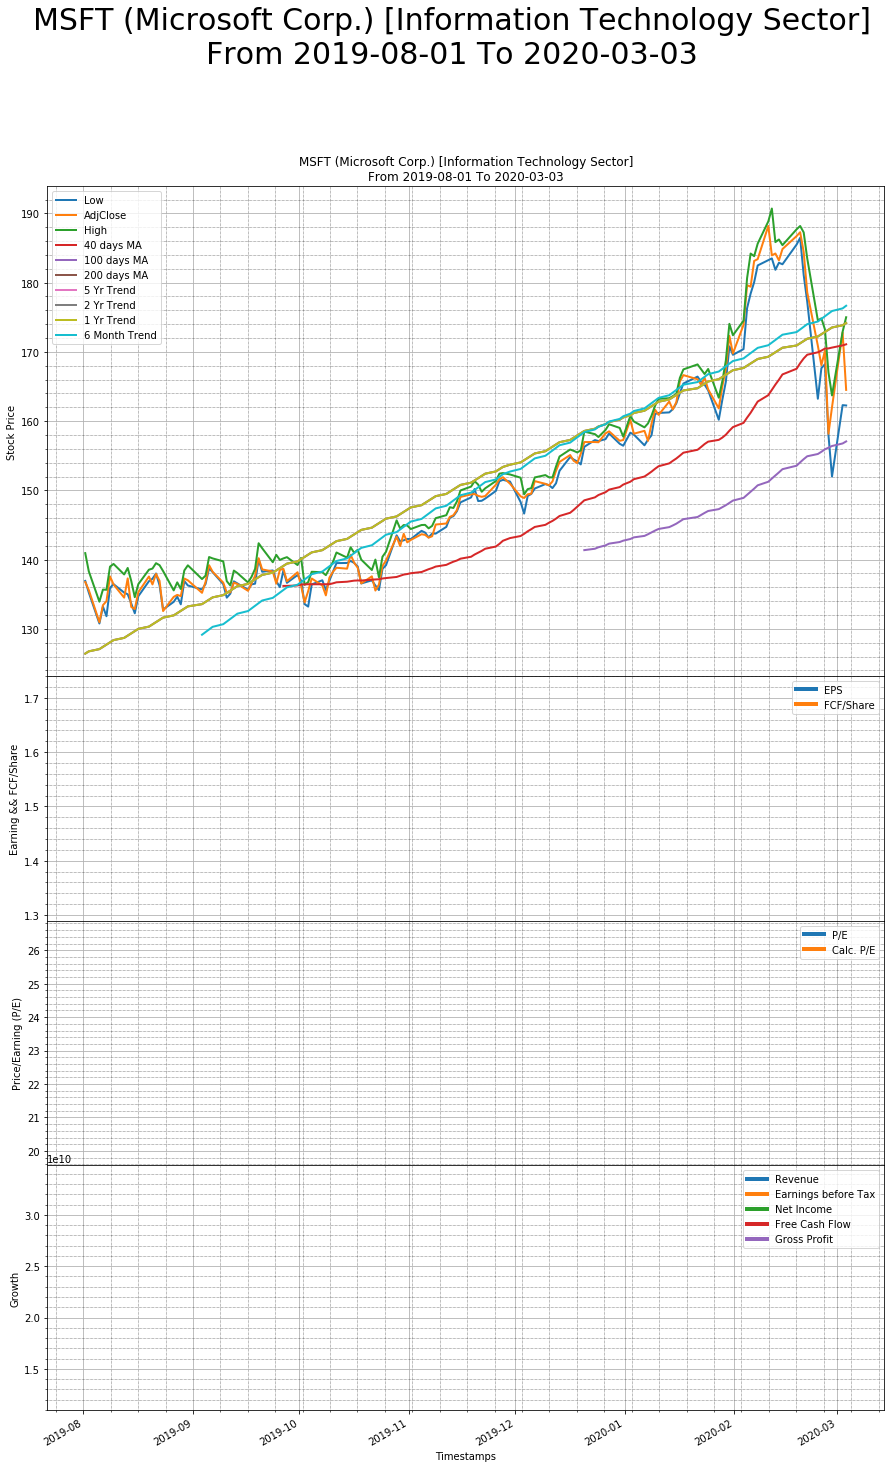

In [11]:
# Plot stock basic charts
price_df = sd.GetStockDataFrame(mystock)
price_df = sd.DatesRange(price_df, '2019-08-01') # limit the data since a specific past date or a range

linear_trends = sd.plot_basic_charts(mystock,price_df)

In [12]:
# Linear Regression Equations returned by the plot call
linear_trends

,5 Years Trend Line Function,2 Years Trend Line Function,1 Year Trend Line Function,6 Months Trend Line Function
0,0.3247 x + 126.4,0.3247 x + 126.4,0.3247 x + 126.4,0.38 x + 129.2


In [13]:
# Get last price quote
sd.quote('csco')

,symbol,date,close,volume
0,csco,2020-03-04 19:55:09,40.76,16688958


In [14]:
# Get last key stats on the stock
sd.key_stat('ibm')

,symbol,Date,No. of Shares,Revenue,Earning before Tax,PE Ratio,Earning per Share,Net Income,Free Cash Flow Margin,Gross Profit,Free Cash Flow per Share
0,ibm,2019-09-30,887291199.0,1.802800e+10,1.522000e+09,16.7728,1.88,1.672000e+09,0.168127,8.335000e+09,3.597


,5 Years Trend Line Function,2 Years Trend Line Function,1 Year Trend Line Function,6 Months Trend Line Function
0,0.3247 x + 126.4,0.3247 x + 126.4,0.3247 x + 126.4,0.38 x + 129.2


<Figure size 1080x432 with 0 Axes>

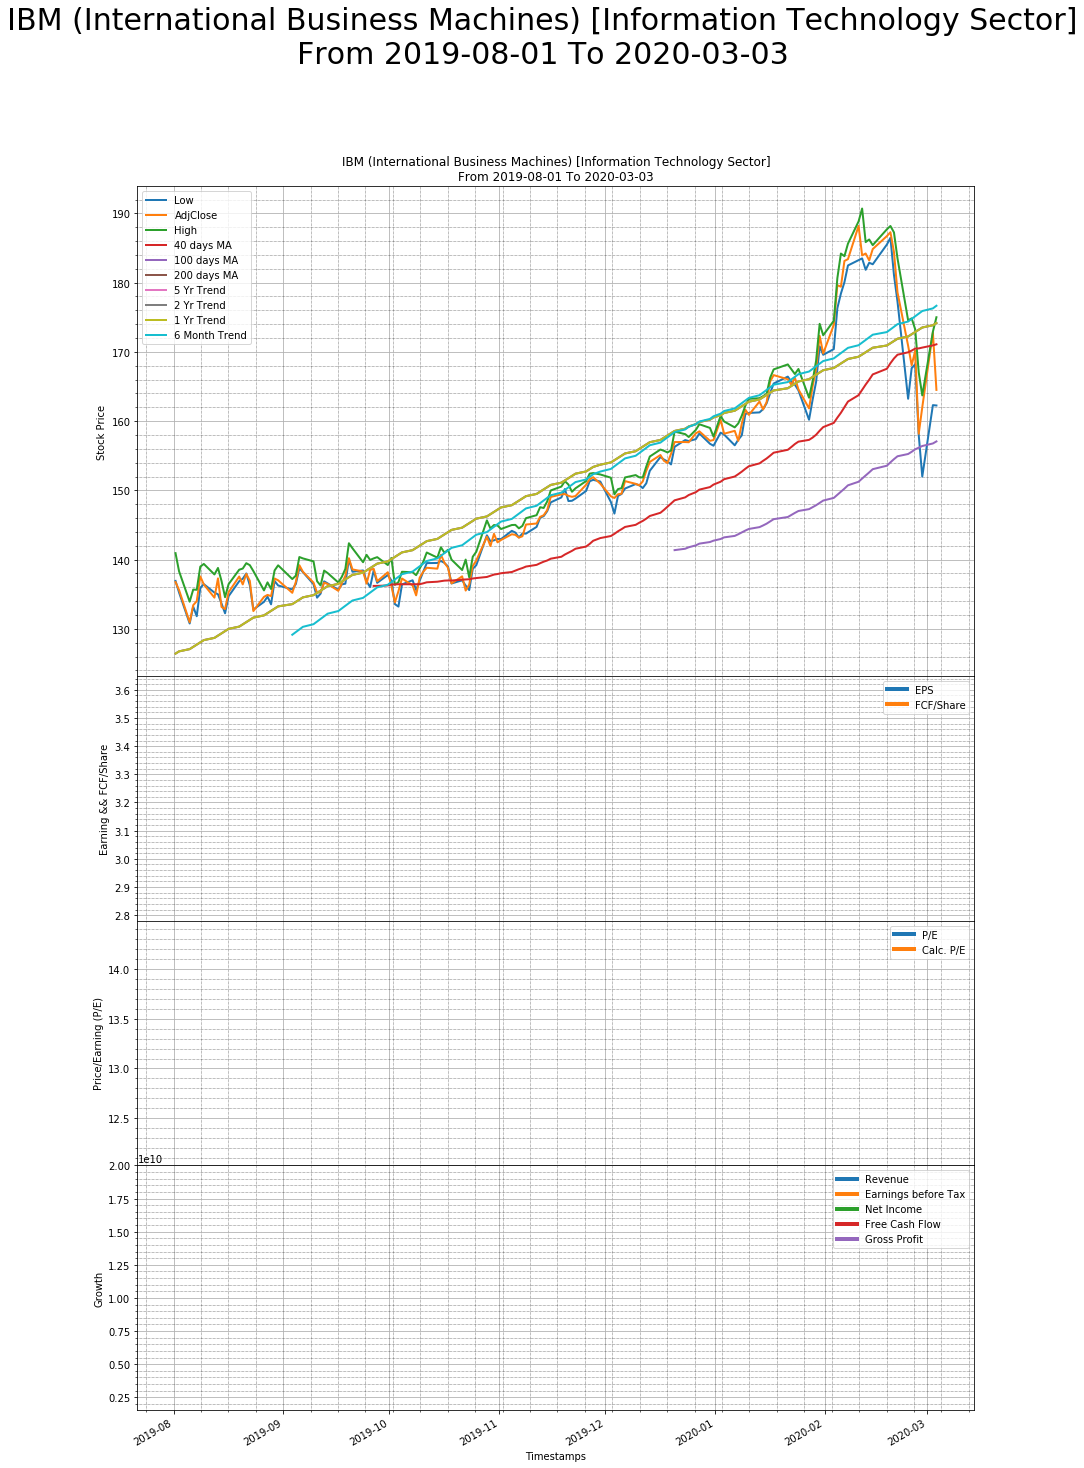

In [15]:
# Plot another stock
price_df_test = sd.DatesRange(price_df, '2019-06-01')
sd.plot_basic_charts(sd.get_stock(),price_df_test)

# The data load functions

In [16]:
# Load stock End of Day prices file
price_df = sd.GetStockDataFrame('msft')

# Load the stock fundamental data
keys, column_map, main_df_org = sd.GetFund_Dict('msft')

# Searching for data by column name

In [17]:
# Search for a key word in the data column names
table,text = sd.FindColumn('Revenue')
table

,column_name,DataFrame
0,Revenue,income-statement
1,Revenue Growth,income-statement
2,Cost of Revenue,income-statement
3,Deferred revenue,balance-sheet-statement
4,Revenue per Share,company-key-metrics
5,SG&A to Revenue,company-key-metrics
6,R&D to Revenue,company-key-metrics
7,Capex to Revenue,company-key-metrics
8,Stock-based compensation to Revenue,company-key-metrics
9,profitabilityIndicatorRatios_eBITperRevenue,financial-ratios


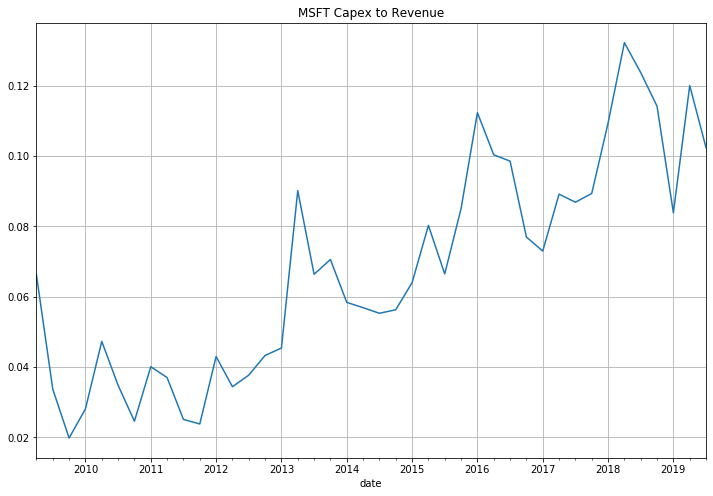

In [18]:
# Now we know where 'Capex to Revenue' is, we can load it from the DataFrame source 'company-key-metrics' as 
# the code below
main_df_org['company-key-metrics']['Capex to Revenue'].plot(figsize=(12,8),
                                                            grid=True, 
                                                            title=sd.get_stock().upper()+' Capex to Revenue')

# Selecting data range from price data frame

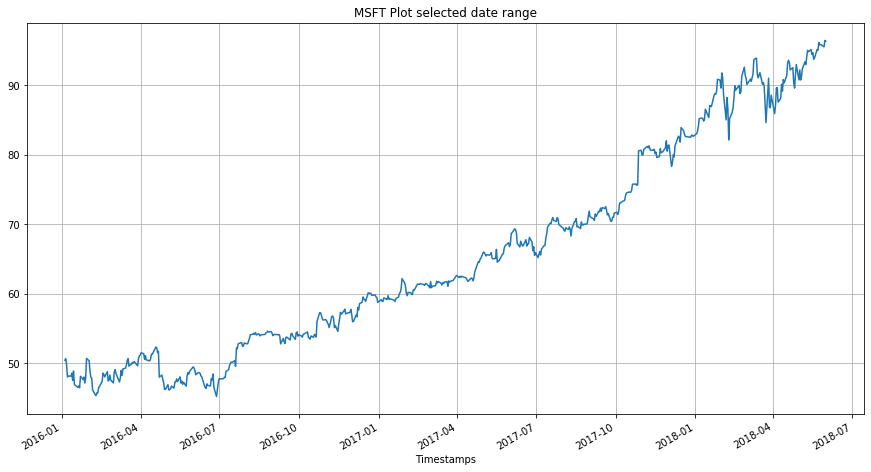

In [19]:
# Limit the stock prices data in the dates range
price_df = sd.DatesRange(price_df, '2016-01-01', '2018-06-01')

# Plot the prices chart
ax1 = price_df['AdjClose'].plot(figsize=(15,8),
                                title=sd.get_stock().upper()+" Plot selected date range").grid()

# Merging DataFrames from multiple sources into one DF

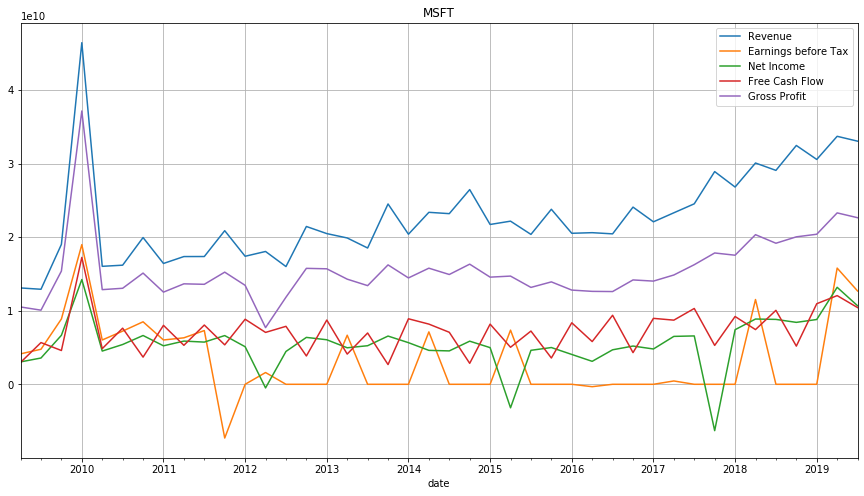

In [20]:
import pandas as pd

# Create a subset of columns in a DataFrame from the stock fundamentals dataset
cols = ['Revenue','Earnings before Tax','Net Income','Free Cash Flow margin','Gross Profit','Net Profit Margin'] # [ 'Shares', 'Price', 'Revenue', 'Earnings']
main_df1 = sd.MakeFund_Subset(main_df_org['income-statement'],cols)

# Create another subset of columns from another fundamentals dataset
cols = ['Number of Shares','Stock Price']
main_df2 = sd.MakeFund_Subset(main_df_org['enterprise-value'],cols)

# Create a 3rd subject of columns from yet another fundamentals dataset
cols = ['Capital Expenditure','Free Cash Flow']
main_df3 = sd.MakeFund_Subset(main_df_org['cash-flow-statement'],cols)

# Create a 4th subject of columns from yet another fundamentals dataset
cols = ['Free Cash Flow per Share']
main_df4 = sd.MakeFund_Subset(main_df_org['company-key-metrics'],cols)


# Merge the 3 dataframes into a single dataframe
main_df = pd.merge(main_df1,main_df2,on='date')
main_df = pd.merge(main_df,main_df3,on='date')
main_df = pd.merge(main_df,main_df4,on='date')

main_df.plot(y=['Revenue','Earnings before Tax','Net Income','Free Cash Flow','Gross Profit'],
             figsize=(15,8),title=sd.get_stock().upper()).grid()


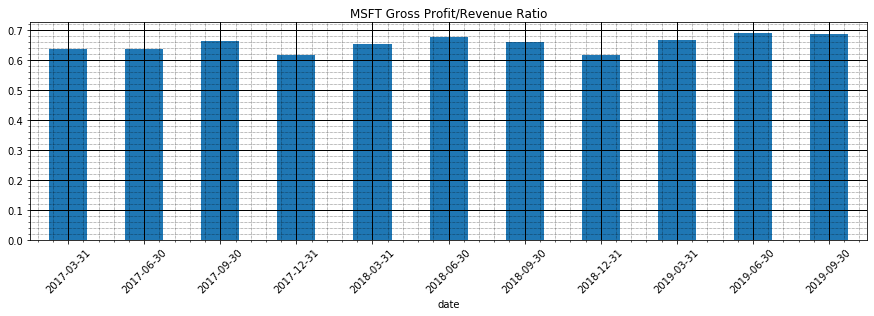

In [21]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

main_df = sd.DatesRange(main_df, '2017-01-01')
fig, ax = plt.subplots()
GrossOverRev_df = main_df['Gross Profit'] / main_df['Revenue']
ax = GrossOverRev_df.plot(ax=ax , kind='bar',
                          figsize=(15,4),
                          title=sd.get_stock().upper()+' Gross Profit/Revenue Ratio')

ax.xaxis.grid( which = 'minor')
ax.grid(True)

_=plt.xticks(rotation=45)

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')
ax.yaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')

ticklabels = GrossOverRev_df.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


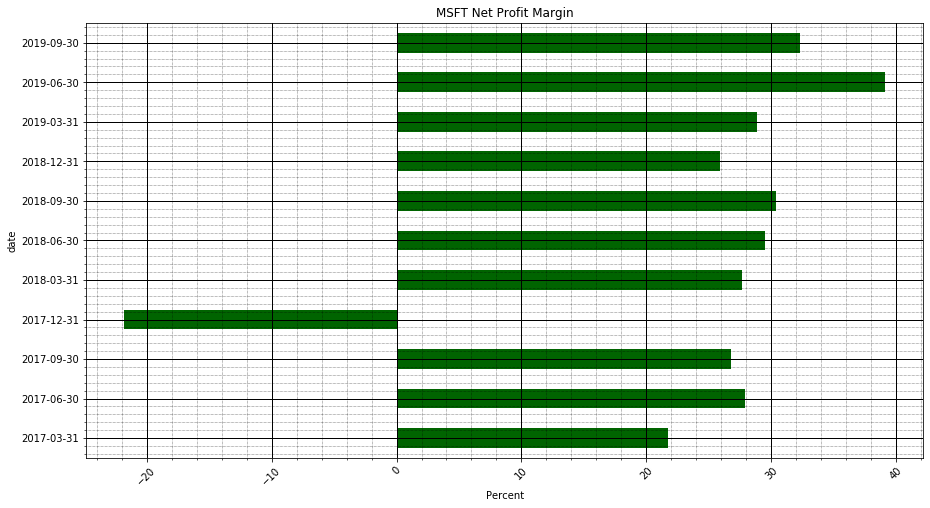

In [22]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
tmp_df = (main_df['Net Profit Margin'] * 100)
_=tmp_df.plot(ax=ax,y="Percent", kind='barh',figsize=(15,8),title=sd.get_stock().upper()+' Net Profit Margin',
              grid=True, color='darkgreen').set_xlabel('Percent')


ax.xaxis.grid( which = 'minor')
ax.grid(True)

_=plt.xticks(rotation=45)

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')
ax.yaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')

ticklabels = tmp_df.index.strftime('%Y-%m-%d')
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Using DatesRange() on fundamental data 

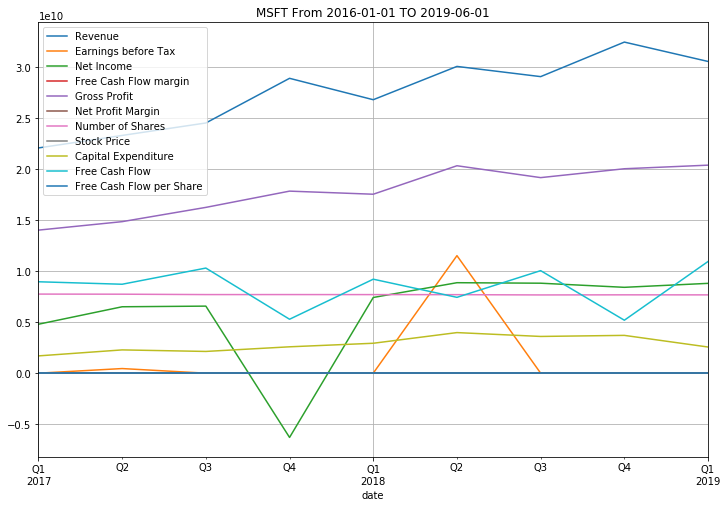

In [23]:
_=sd.DatesRange(main_df, '2016-01-01', '2019-06-01').plot(figsize=(12,8),
                                                                     grid=True,
                                                                     title=sd.get_stock().upper()+' From 2016-01-01 TO 2019-06-01')

<Figure size 1080x432 with 0 Axes>

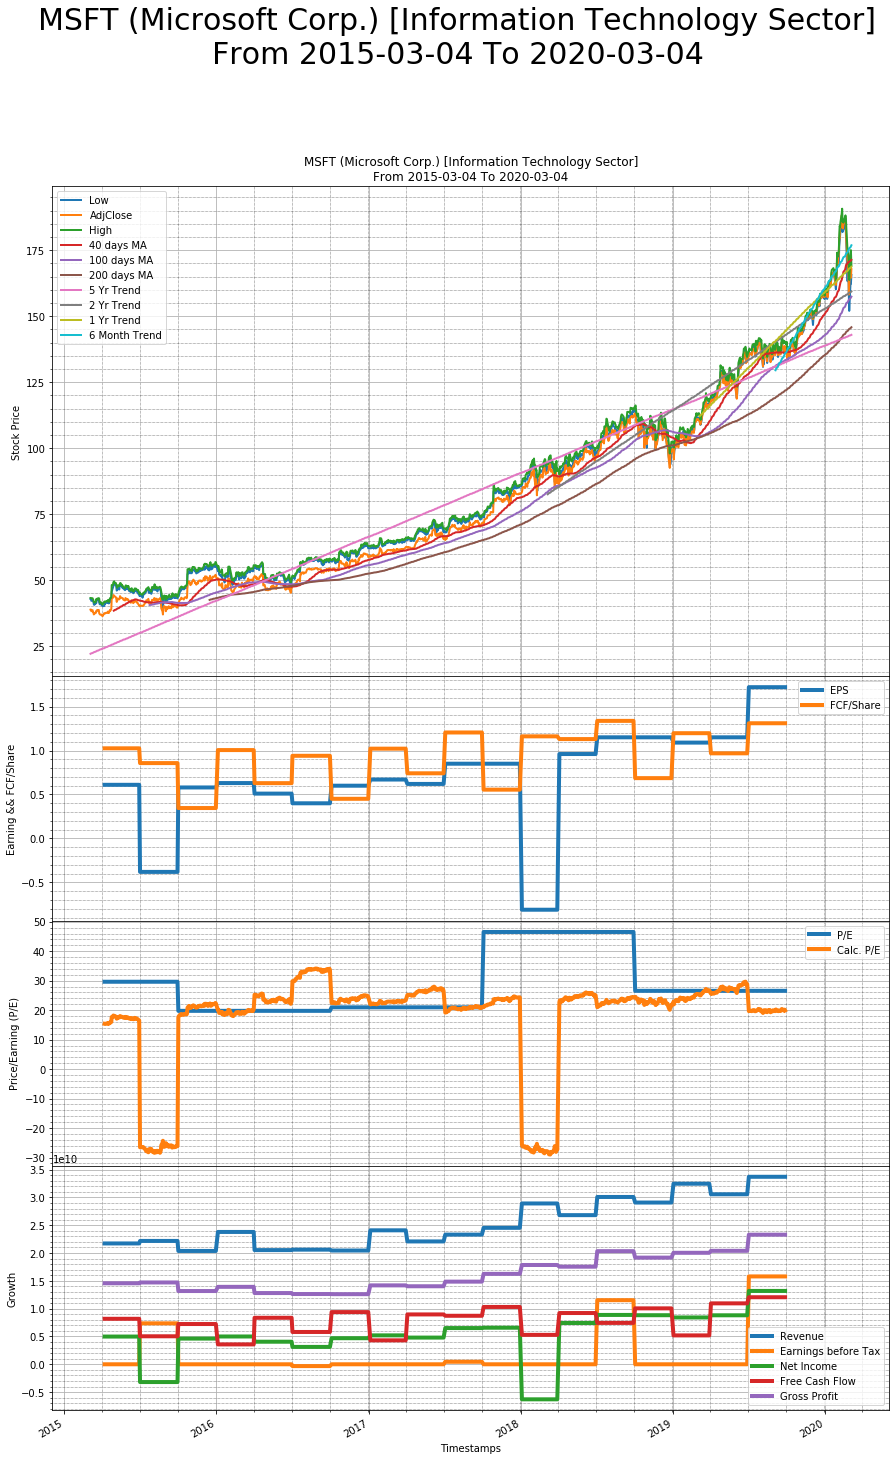

In [24]:
# Plot price chart with trend lines, EPS, and PE ratios
_=sd.plot_basic_charts('msft')

# Plot a single key stat item

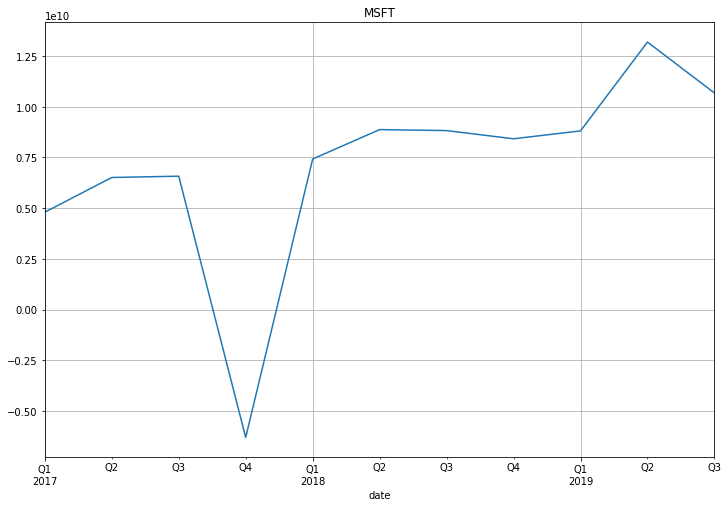

In [25]:
main_df['Net Income'].plot(figsize=(12,8), title = sd.get_stock().upper()).grid()

# Plot the TrendChart()

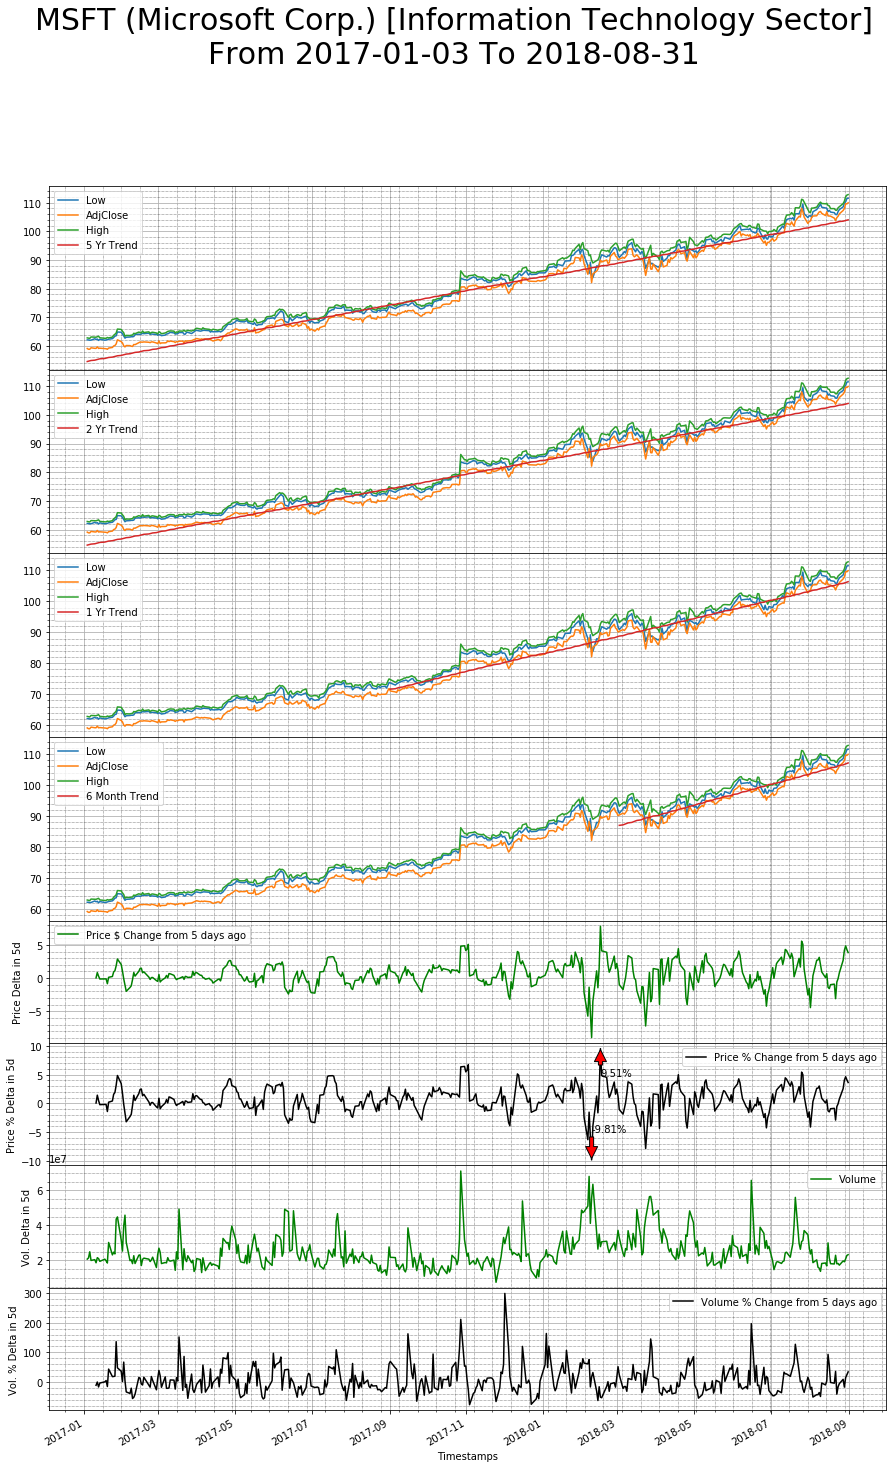

In [26]:
price_df = sd.GetStockDataFrame('msft')
price_df = sd.DatesRange(price_df, '2017-01-01', '2018-09-01')
price_data_df, maximums_table_df = sd.TrendsPlot('msft',price_df)

# Show the Maximums Table in price and volume

In [27]:
maximums_table_df

,Date,Price,Volume
Change Type,,,
Max % Rise,2018-02-15,9.51%,--
Max % Drop,2018-02-08,-9.81%,--
Max % Rise,2017-12-01,--,297.71%
Max % Drop,2017-11-03,--,-75.19%


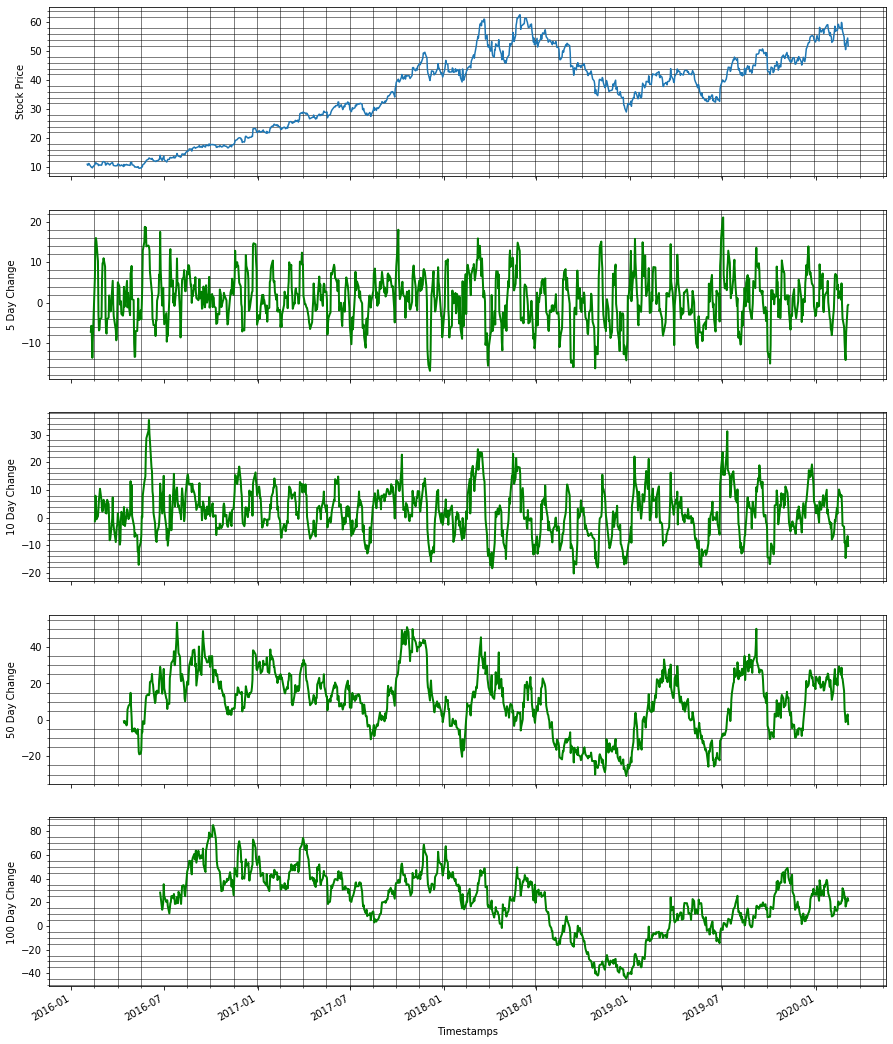

,5,10,20,30,40,50,60,80,100,200,Directions 5,Directions 10,Directions 20,Directions 30,Directions 40,Directions 50,Directions 60,Directions 80,Directions 100,Directions 200
count,1024.000000,1019.000000,1009.000000,999.000000,989.000000,979.000000,969.000000,949.000000,929.000000,829.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,0.961340,1.996962,4.020424,6.022917,8.089660,10.215530,12.361472,16.836810,21.134861,45.119342,0.128906,0.178711,0.165039,0.290039,0.379883,0.426758,0.491211,0.565430,0.561523,0.413086
std,6.217695,8.599422,11.960642,14.324725,15.941256,17.453569,19.330365,22.646816,25.745097,50.067723,0.992141,0.981897,0.979311,0.944635,0.906814,0.880164,0.840054,0.779513,0.769738,0.799722
min,-16.961494,-20.252194,-24.555741,-28.239363,-34.006094,-30.855374,-35.496778,-44.009262,-44.501817,-48.453608,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-2.928111,-3.466103,-4.761080,-3.623463,-2.986425,-1.630303,0.698600,4.204709,6.034486,1.267636,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.040943,1.645285,3.042420,5.210504,8.583489,12.059026,13.488154,19.344180,23.382203,48.153259,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.899494,7.534649,12.172086,16.579066,18.839246,22.445676,25.562282,32.409554,39.416055,86.213063,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.175025,35.367115,46.919077,55.203044,46.691933,53.451877,59.003272,80.268597,85.146443,164.426055,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
import pandas as pd

price_df = sd.GetStockDataFrame('mu')
price_df = sd.DatesRange(price_df, '2016-02-01')
periods = [5,10,20,30,40,50,60,80,100,200]
price_changes = pd.DataFrame(columns = periods+['Timestamps'])
updownlist = []

fig, ax = plt.subplots(5,1, figsize=(15,20), sharex=True)

for axx in ax:
    axx.xaxis.grid( which = 'minor')
    axx.yaxis.grid( which = 'minor')
    axx.grid(True)

    _=plt.xticks(rotation=45)
    axx.minorticks_on()

    axx.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
    axx.xaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')
    axx.yaxis.grid(which='major', linestyle='-', linewidth='1.0', color='black')


for i in periods:    
    price_changes[i] = (price_df['AdjClose'].pct_change(i) * 100  ).dropna().copy(deep=True)

    updownlist = list()   
    for n in price_changes[i]:
        if n >= 0:
            updownlist.append(1)
        elif n < 0:
            updownlist.append(-1)
        else:
            updownlist.append(0)
    
    price_changes['Directions '+str(i)] = updownlist
    
    
price_df['AdjClose'].plot(ax=ax[0])    
ax[0].set_ylabel('Stock Price')


price_changes[5].plot(ax=ax[1], color='green', lw=2.0)
ax[1].set_ylabel('5 Day Change')

price_changes[10].plot(ax=ax[2], color='green', lw=2.0)
ax[2].set_ylabel('10 Day Change')

price_changes[50].plot(ax=ax[3], color='green', lw=2.0)
ax[3].set_ylabel('50 Day Change')


price_changes[100].plot(ax=ax[4], color='green', lw=2.0)
ax[4].set_ylabel('100 Day Change')

plt.show()    

price_changes.describe()

Mean = 21.13%
Std. Div. = 25.75%
Variance = 662.81%


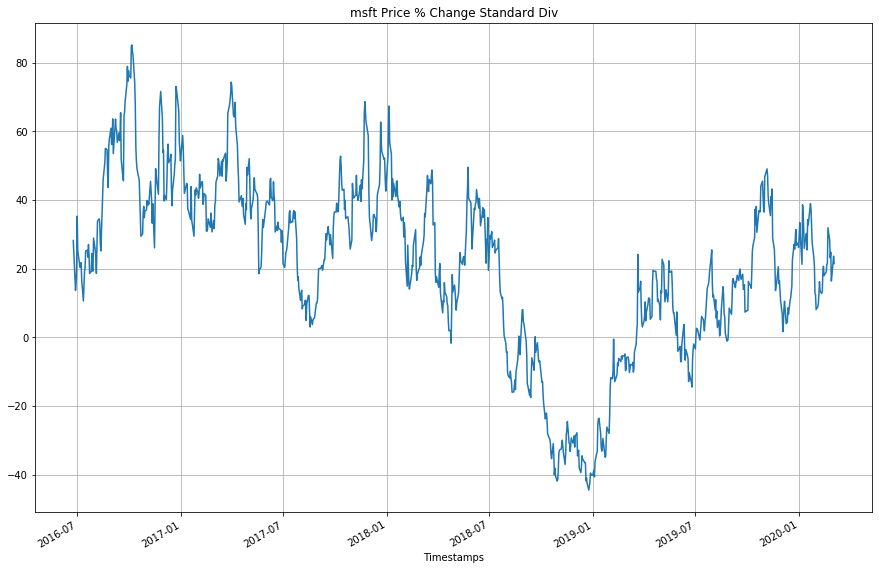

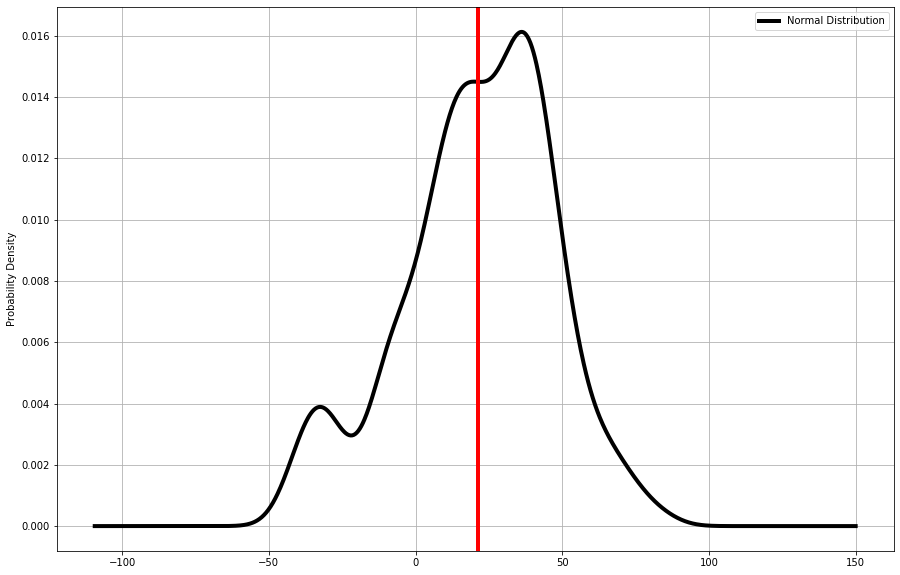

In [29]:
price_changes100 = price_changes[100]
price_changes100.plot(figsize=(15,10),title=sd.get_stock()+' Price % Change Standard Div').grid()

test_df = pd.DataFrame({'Normal Distribution':price_changes100.tolist()})
ax = test_df.plot(kind='kde',color='black', lw=4, grid=True,figsize=(15,10))

ax.set_ylabel('Probability Density')
ax.axvline(x = price_changes100.mean(),linewidth=4, color='r')
print("Mean = "+str(round(price_changes100.mean(),2))+ "%")
print("Std. Div. = "+str(round(price_changes100.std(),2))+ "%")
print("Variance = "+str(round(price_changes100.var(),2))+ "%")

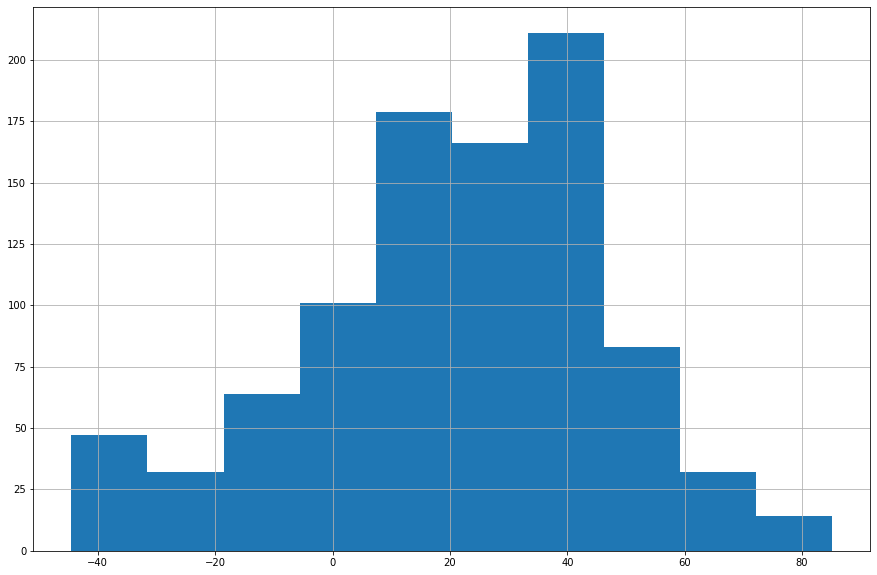

In [30]:
price_changes100.hist(figsize=(15,10))

# Search for a column containing 'cash flow' substring

In [31]:
f,s = sd.FindColumn('cash flow')
f

,column_name,DataFrame
0,Free Cash Flow margin,income-statement
1,Operating Cash Flow,cash-flow-statement
2,Investing Cash flow,cash-flow-statement
3,Financing Cash Flow,cash-flow-statement
4,Net cash flow / Change in cash,cash-flow-statement
5,Free Cash Flow,cash-flow-statement
6,Operating Cash Flow per Share,company-key-metrics
7,Free Cash Flow per Share,company-key-metrics
8,EV to Operating cash flow,company-key-metrics
9,EV to Free cash flow,company-key-metrics
